In [2]:
#importing Libraries
import pandas as pd
import numpy as np
from pandas import Series , DataFrame
import scipy

from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as si
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import sklearn
from sklearn.preprocessing import scale 
from collections import Counter
%matplotlib inline
rcParams['figure.figsize']= 10,5
si.set_style('whitegrid')

In [3]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weatherFall.csv').set_index('date')

In [4]:
df.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,maxdewptm,mindewptm,meanpressurem,maxpressurem,minpressurem,precipm,windspeed
date,,,,,,,,,,,,,,,
01-08-18,29.0,31,27,30,83%,86%,80%,85%,20,19,997.5 mbr,998 mbar,997 mbar,360mm,2 mph
02-08-18,28.5,30,27,29,88%,90%,86%,87%,19,18,1000.5,1001,1000,355mm,1.864 mph
03-08-18,28.5,31,26,29,83%,93%,73%,82%,24,23,999.5,1001,998,370mm,4 mph
04-08-18,27.0,31,27,29,88.50%,93%,84%,88%,20,18,999,1000,998,350mm,0 mph
05-08-18,29.5,31,28,28,88.50%,93%,84%,87%,21,19,999,1000,998,352mm,.621 mph


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,122.0,28.204918,3.669032,21.0,25.50,29.0,30.5,54.0
MaxTemp,122.0,30.991803,2.800519,23.0,29.00,32.0,33.0,36.0
MinTemp,122.0,24.991803,3.385667,18.0,22.25,26.0,28.0,31.0
meantempm_1,122.0,28.565574,3.728354,22.0,26.00,29.0,30.0,55.0
maxdewptm,122.0,28.000000,5.469676,15.0,24.25,27.0,32.0,40.0
mindewptm,122.0,24.172131,4.754628,13.0,21.00,23.0,27.0,38.0


In [8]:
df_data=df.ix[:,(5,11)].values
df_data_names= ['meantempm','MaxTemp']
y= df.ix[:,9].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


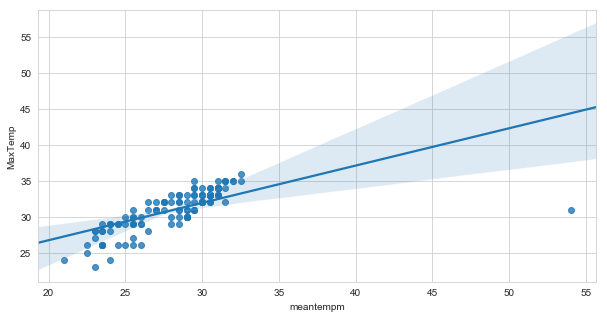

In [9]:
si.regplot(x='meantempm', y='MaxTemp', data= df, scatter=True)

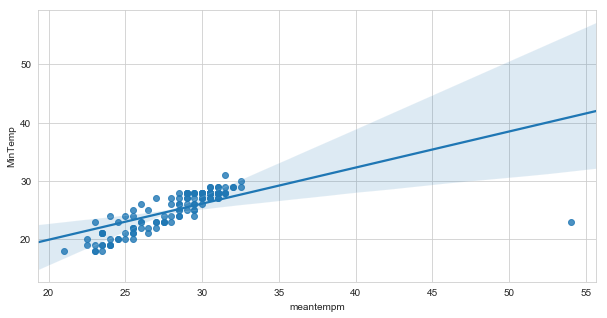

In [10]:
si.regplot(x='meantempm', y='MinTemp', data= df, scatter=True)

In [11]:
df.isnull().sum()

meantempm         0
MaxTemp           0
MinTemp           0
meantempm_1       0
meanhumidity      0
maxhumidity       0
minhumidity       0
meanhumidity_1    0
maxdewptm         0
mindewptm         0
meanpressurem     0
maxpressurem      0
minpressurem      0
precipm           0
windspeed         0
dtype: int64

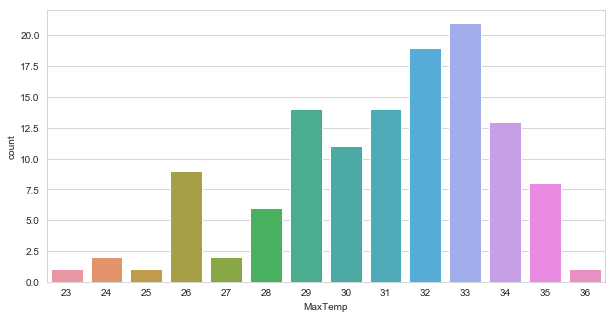

In [12]:
si.countplot(x='MaxTemp', data=df)

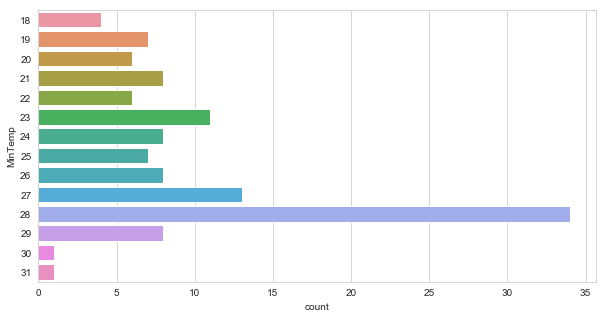

In [13]:
si.countplot(y='MinTemp', data=df)

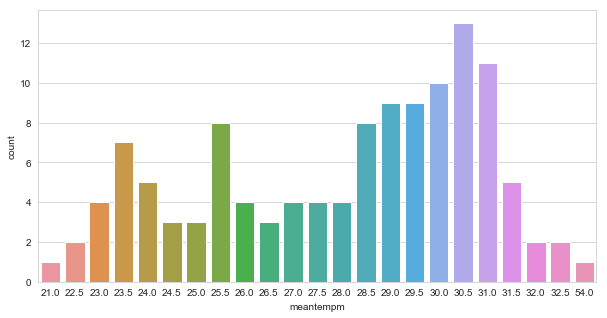

In [14]:
si.countplot(x='meantempm', data=df)

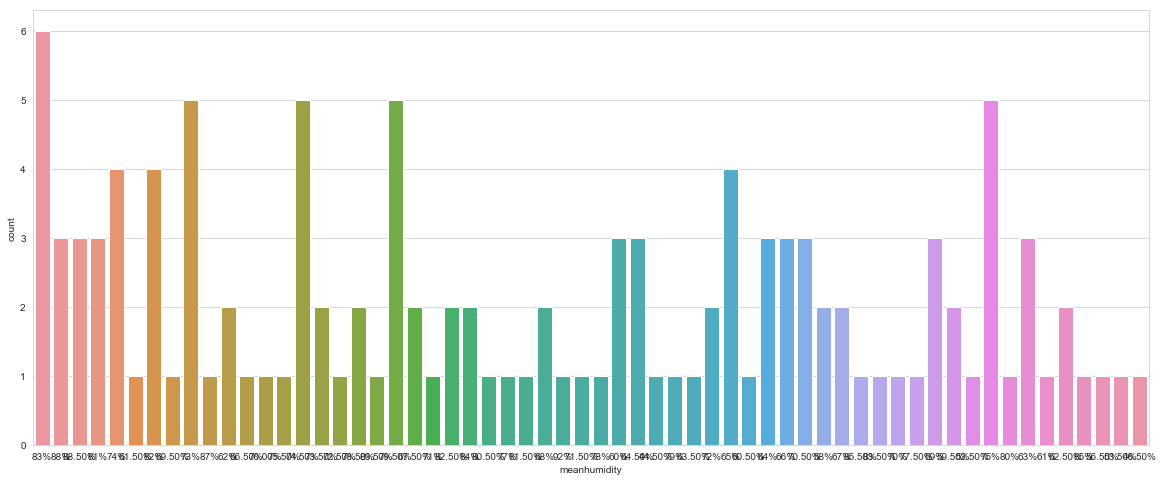

In [17]:

plt.rcParams['figure.figsize'] = [20, 8]
si.countplot(x='meanhumidity', data=df)

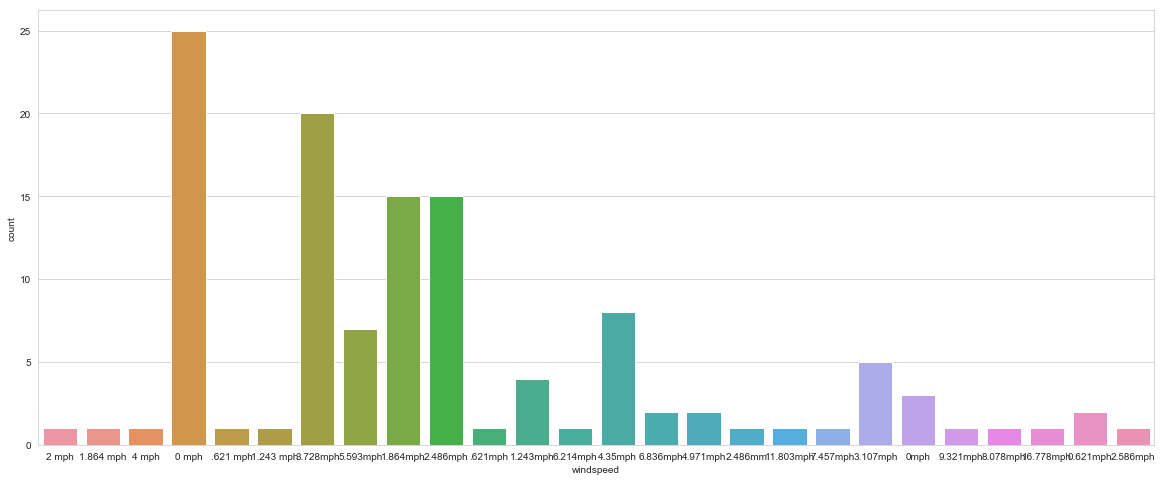

In [18]:
si.countplot(x='windspeed', data=df)

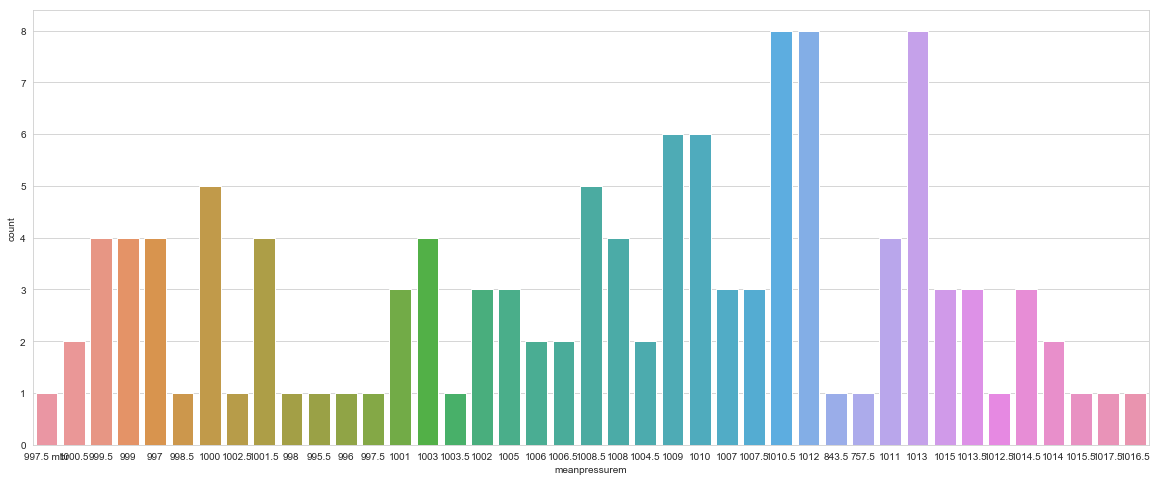

In [19]:
  si.countplot(x='meanpressurem', data=df)

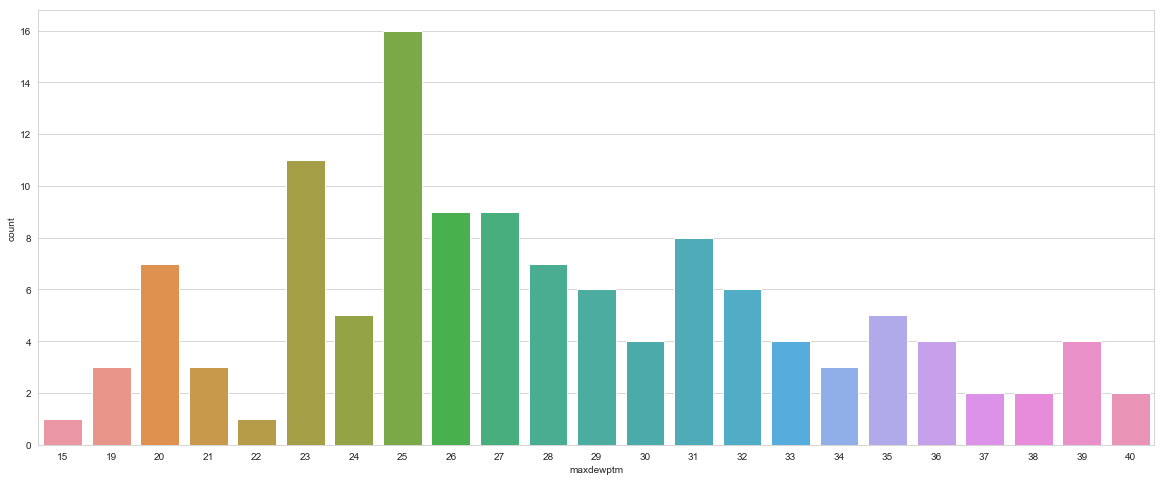

In [21]:
   si.countplot(x='maxdewptm', data=df)

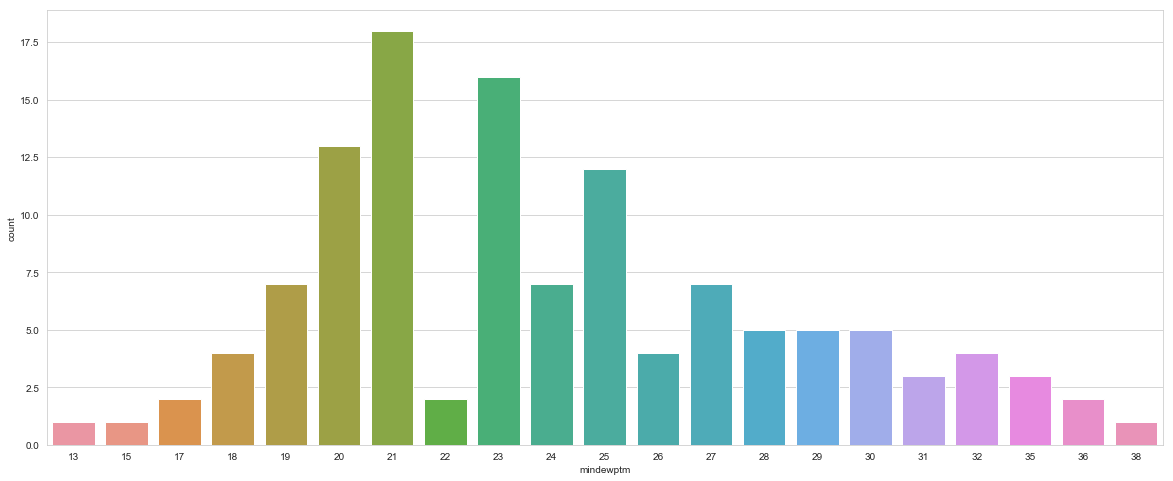

In [23]:
   si.countplot(x='mindewptm', data=df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 01-08-18 to 30-11-18
Data columns (total 15 columns):
meantempm         122 non-null float64
MaxTemp           122 non-null int64
MinTemp           122 non-null int64
meantempm_1       122 non-null int64
meanhumidity      122 non-null object
maxhumidity       122 non-null object
minhumidity       122 non-null object
meanhumidity_1    122 non-null object
maxdewptm         122 non-null int64
mindewptm         122 non-null int64
meanpressurem     122 non-null object
maxpressurem      122 non-null object
minpressurem      122 non-null object
precipm           122 non-null object
windspeed         122 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 20.2+ KB


In [25]:
def label_encoder(df):
    for c in df.columns:
        if df[c].dtypes == 'object':
            label_encoder = LabelEncoder()
            encoded_values = label_encoder.fit_transform(df[c])
            df[c] = encoded_values
    return df

In [26]:
# Processsing NA Columns
def process_na_columns(df, tolerance=0.3):
    dataset_size = df.shape[0]
    tolerate_na_size = int(dataset_size * tolerance)
    
    for c in df.columns:
        na_counts = df[c].isna().sum()
        
        if na_counts != 0:
            if na_counts > tolerate_na_size:
                df = df.drop([c], axis=1)
            else:
                if df[c].dtypes == 'object':
                    values = df[c].value_counts()
                    max_val = values.index[0] # Highest Occurrence
                    df[c].replace(to_replace=pd.np.nan, value=max_val, inplace=True)
                else:
                    imputer = Imputer(missing_values='NaN', strategy='mean')
                    imputed_values = imputer.fit_transform(df[c].values.reshape(-1, 1))
                    df[c] = imputed_values
    return df 

In [27]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weatherFall.csv').set_index('date')
df.replace(to_replace='None', value=pd.np.nan, inplace=True)
pd.options.display.max_columns=None
pd.options.display.max_rows=None
print(df.shape)
df

(122, 15)


,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,maxdewptm,mindewptm,meanpressurem,maxpressurem,minpressurem,precipm,windspeed
date,,,,,,,,,,,,,,,
01-08-18,29.0,31,27,30,83%,86%,80%,85%,20,19,997.5 mbr,998 mbar,997 mbar,360mm,2 mph
02-08-18,28.5,30,27,29,88%,90%,86%,87%,19,18,1000.5,1001,1000,355mm,1.864 mph
03-08-18,28.5,31,26,29,83%,93%,73%,82%,24,23,999.5,1001,998,370mm,4 mph
04-08-18,27.0,31,27,29,88.50%,93%,84%,88%,20,18,999,1000,998,350mm,0 mph
05-08-18,29.5,31,28,28,88.50%,93%,84%,87%,21,19,999,1000,998,352mm,.621 mph
06-08-18,30.0,34,26,31,81%,94%,68%,70%,23,22,997,998,996,359mm,1.243 mph
07-08-18,30.0,33,27,29,74%,92%,56%,73%,26,24,998.5,999,998,356mm,3.728mph
08-08-18,31.5,32,31,31,61.50%,62%,61%,61%,27,25,1000,1002,998,361mm,5.593mph
09-08-18,29.5,31,28,29,82%,92%,72%,80%,25,20,1002.5,1004,1001,367mm,5.593mph


In [28]:
df = process_na_columns(df)

In [29]:
df = label_encoder(df)

In [30]:
df

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,maxdewptm,mindewptm,meanpressurem,maxpressurem,minpressurem,precipm,windspeed
date,,,,,,,,,,,,,,,
01-08-18,29.0,31,27,30,50,21,36,31,20,19,36,21,24,57,11
02-08-18,28.5,30,27,29,56,25,41,33,19,18,1,1,0,52,7
03-08-18,28.5,31,26,29,50,28,31,28,24,23,40,1,25,64,17
04-08-18,27.0,31,27,29,57,28,39,34,20,18,39,0,25,48,2
05-08-18,29.5,31,28,28,57,28,39,33,21,19,39,0,25,50,0
06-08-18,30.0,34,26,31,46,29,26,16,23,22,34,20,22,55,5
07-08-18,30.0,33,27,29,34,27,15,19,26,24,38,22,25,53,16
08-08-18,31.5,32,31,31,10,3,19,7,27,25,0,2,25,58,20
09-08-18,29.5,31,28,29,48,27,30,26,25,20,5,4,1,61,20


In [31]:
y = df['meantempm']
X = df.drop(['MaxTemp', 'meantempm'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [34]:
LogReg=LogisticRegression()
LogReg.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'